In [14]:
from CMOS_Plot_Tools import CPT
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
plt.rcParams["figure.figsize"] = (16,12)
cmap='Blues'
from tqdm import tqdm
import itertools

In [15]:
filepathp1 = r"C:\Users\jtincan\Desktop\F0346_01152023\F0346_minerva"
filepathp2 = r"C:\Users\jtincan\Desktop\F0346_01152023\F0346_minerva_p2"
impnamep1= filepathp1 + r"\F0346_imp.h5"
impnamep2= filepathp2 + r"\F0346_imp_p2.h5"

In [16]:
F0346_p1=CPT(data_path=impnamep1)
F0346_p2=CPT(data_path=impnamep2)

Impedance Image Phase Types in the Dataset:  ['image_2d_ph1', 'image_2d_ph2']
Number of images in dataset with 2 phase(s):  287
Impedance Image Phase Types in the Dataset:  ['image_2d_ph1', 'image_2d_ph2']
Number of images in dataset with 2 phase(s):  144


c:\users\jtincan\appdata\local\continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\jtincan\appdata\local\continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


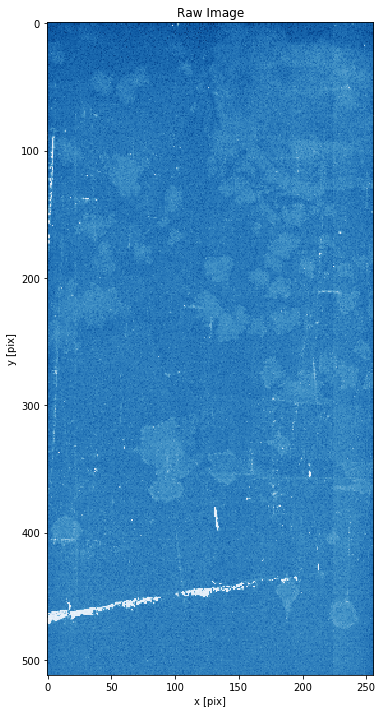

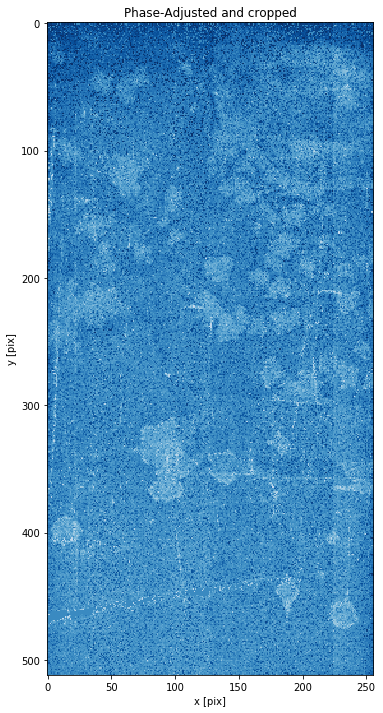

In [19]:
prev_index=280
image=F0346_p1.get_data(index=prev_index)[0]
image=F0346_p1.get_data(index=prev_index)[1]
# print(image,vmin,vmax)

fig, ax_main = plt.subplots()
ax_main.imshow(image,cmap=cmap)
ax_main.set_xlabel("x [pix]")
ax_main.set_ylabel("y [pix]")
ax_main.set_title("Raw Image")

cropped_image,vmin,vmax=F0346_p1.process_image(index=prev_index,crop=False,Nstd=3)
fig, ax_main = plt.subplots()
ax_main.imshow(cropped_image,cmap=cmap,vmin=vmin,vmax=vmax)
ax_main.set_xlabel("x [pix]")
ax_main.set_ylabel("y [pix]")
ax_main.set_title("Phase-Adjusted and cropped")
plt.show()

In [11]:
F0346_p1.make_video(index_rng=[0,287],Nstd=3,cmap=cmap)

Processing Images:   0%|                                                                       | 0/287 [00:00<?, ?it/s]c:\users\jtincan\appdata\local\continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\jtincan\appdata\local\continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Processing Images: 100%|█████████████████████████████████████████████████████████████| 287/287 [00:12<00:00, 22.35it/s]


Saving...
Saved to C:\Users\jtincan\Desktop\F0346_01152023\F0346_minerva\F0346_imp.gif


In [4]:
index = 0
rphase_images = fxyz.get_data(index=index)

lims = fxyz.get_croplims(index=0,thresh=.00005)
# cphase_images=fxyz.get_crop(index=index)


raw_offset = rphase_images[0]-rphase_images[1]
# crop_offset = cphase_images[0]-cphase_images[1]

r_adjusted=[];c_adjusted=[];
r_adjusted.append(rphase_images[0] - raw_offset)
# c_adjusted.append(cphase_images[0] - crop_offset)

r_adjusted.append(rphase_images[1] + raw_offset)
# c_adjusted.append(cphase_images[1] + crop_offset)

AttributeError: 'CPT' object has no attribute 'get_croplims'

NameError: name 'r_adjusted' is not defined

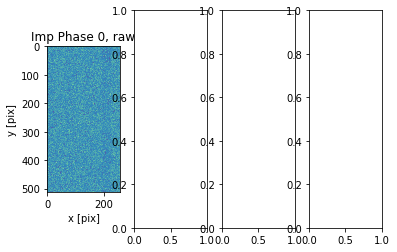

In [5]:
fig, ax_main = plt.subplots(nrows=1,ncols=4)
for i in range(2):
    ax_main[i].imshow(rphase_images[i],cmap=cmap)
    ax_main[i].set_xlabel("x [pix]")
    ax_main[i].set_ylabel("y [pix]")
    ax_main[i].set_title("Imp Phase {}, raw".format(i))
    ax_main[i+2].imshow(r_adjusted[i],cmap=cmap)
    ax_main[i+2].set_xlabel("x [pix]")
    ax_main[i+2].set_ylabel("y [pix]")
    ax_main[i+2].set_title("Imp Phase {}, raw adjusted".format(i))
    
fig, ax_main = plt.subplots(nrows=1,ncols=4)
for i in range(2):
    ax_main[i].imshow(cphase_images[i],cmap=cmap)
    ax_main[i].set_xlabel("x [pix]")
    ax_main[i].set_ylabel("y [pix]")
    ax_main[i].set_title("Imp Phase {}, crop".format(i))
    ax_main[i+2].imshow(c_adjusted[i],cmap=cmap)
    ax_main[i+2].set_xlabel("x [pix]")
    ax_main[i+2].set_ylabel("y [pix]")
    ax_main[i+2].set_title("Imp Phase {}, crop adjusted".format(i))

# Testing the image used for determining the crop bounds

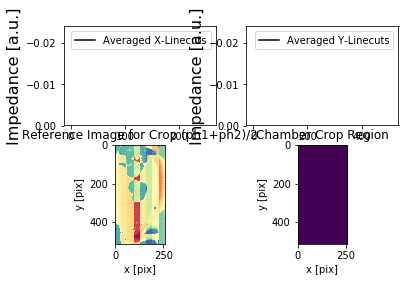

In [5]:
[phase1,phase2]=fxyz.get_data(index=30)
avphase = (phase1+phase1)/2
av_xlinecut = np.mean(avphase,axis=0)
av_ylinecut = np.mean(avphase,axis=1)

xcrop,ycrop = (av_xlinecut>.00005) , (av_ylinecut>.00005)
xycrop = np.outer(ycrop,xcrop)

fig, axs = plt.subplots(nrows=2,ncols=2)
for i in range(avphase.shape[0]):
    axs[0,0].plot(avphase[i,:],alpha=.15)
for i in range(avphase.shape[1]):
    axs[0,1].plot(avphase[:,i],alpha=.15)
axs[0,0].plot(av_xlinecut,'black',label="Averaged X-Linecuts")
axs[0,0].set_xlabel('x [pix]')
axs[0,0].set_ylim(bottom=-.0001)
axs[0,0].legend()
axs[0,0].set_ylabel('Impedance [a.u.]',fontsize=16)

axs[0,1].plot(av_ylinecut,'black',label="Averaged Y-Linecuts")
axs[0,1].set_xlabel('y [pix]')
axs[0,1].set_ylim(bottom=-.0001)
axs[0,1].legend()
axs[0,1].set_ylabel('Impedance [a.u.]',fontsize=16)


axs[1,0].imshow(avphase,cmap=cmap)
axs[1,0].set_xlabel("x [pix]")
axs[1,0].set_ylabel("y [pix]")
axs[1,0].set_title("Reference Image for Crop (ph1+ph2)/2")

axs[1,1].imshow(xycrop)
axs[1,1].set_xlabel("x [pix]")
axs[1,1].set_ylabel("y [pix]")
axs[1,1].set_title("Chamber Crop Region")
plt.show()

In [6]:
print(not False)

True
